# Topic Modelling on [data_schoolofinf](../../data/data_schoolofinf)

In [7]:
import logging, os
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import warnings
warnings.filterwarnings('ignore')

In [22]:
import pickle as pkl
import pandas as pd
from numpy.random import RandomState
rng = RandomState(93748573)
from pprint import pprint

In [3]:
from gensim import models
from gensim.corpora import Dictionary
# Use coherence model to measure the LDA models generated
from gensim.models.coherencemodel import CoherenceModel

2018-01-30 12:00:55,873 : INFO : 'pattern' package not found; tag filters are not available for English


In [5]:
# ref: http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/Gensim%20Newsgroup.ipynb
import pyLDAvis.gensim as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook()

In [6]:
from IPython.display import HTML

In [8]:
DATA_DIR = '../../data/data_schoolofinf/'
LDATUNING_DIR = '../src/'

## Hyper-parameters for LDA

Creates the topic model using the corpus, dictionary and index created.

- Iterations :: number of times each documents is seen in the E-step in online learning
- passes     :: number of times the corpus is seen

In [16]:
passes = 30  # total number of times the corpus is seen
iterations = 1000  # how many times each document is seen
chunksize = 2000  # how many documents each mini-batch
update_every = 0  # Batch learning
eval_every = None

## Model 1: metadata + pdf 1997-2017

In [9]:
# Import the dataset:
df_combined_toks = pd.read_pickle(os.path.join(DATA_DIR,'toks', 'toks.combined.pkl'))
df_combined_toks.head(3)

,year,toks_metada,toks_pdf2txt
pub_id,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,"[ballooning, stability, analysis, jet, hmode, ...",
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[query, processing, data, integration, chapter...",
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,"[comprehension, syntax, syntax, comprehension,...","[comprehension, syntax, citation, published, v..."


In [13]:
df_combined_toks = df_combined_toks.drop(
    df_combined_toks[(df_combined_toks.year < 1997) | (df_combined_toks.year > 2017)].index)

In [10]:
dict_combined = Dictionary.load(os.path.join(DATA_DIR,'corpora','dictionary.all'))

2018-01-30 12:11:43,280 : INFO : loading Dictionary object from ../../data/data_schoolofinf/corpora/dictionary.all
2018-01-30 12:11:43,597 : INFO : loaded ../../data/data_schoolofinf/corpora/dictionary.all


## Model 2 : Metadata only; 1997-2017

In [12]:
dict_meta = Dictionary.load(os.path.join(DATA_DIR,'corpora','dictionary.meta'))

2018-01-30 12:13:29,392 : INFO : loading Dictionary object from ../../data/data_schoolofinf/corpora/dictionary.meta
2018-01-30 12:13:29,457 : INFO : loaded ../../data/data_schoolofinf/corpora/dictionary.meta


In [15]:
df_metadata = df_combined_toks[['year','toks_metada']]
# Create a bow tagging for each publication:
df_metadata['bow'] = df_metadata['toks_metada'].apply(dict_meta.doc2bow)

# Generate a corpus based on the tokens, which we will be using later
corpus_meta = df_metadata.bow.tolist()

From `ldatuning`, we observe that there are about 35 topics: 

~# TODO: [INSERT PIC](../)

In [19]:
# Parameters FOR LDA:
num_topics = 35
corpus = corpus_meta
tmp = dict_meta[0]
id2word = dict_meta.id2token

In [21]:
# This is the fullpub LDA model.
lda_meta = models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    eta='auto',
    alpha='auto',
    num_topics=num_topics,
    iterations=iterations,
    passes=passes,
    update_every=update_every,
    eval_every=eval_every,
    random_state=rng)

2018-01-30 12:30:31,109 : INFO : using autotuned alpha, starting with [0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857]
2018-01-30 12:30:31,111 : INFO : using serial LDA version on this node
2018-01-30 12:30:32,531 : INFO : running batch LDA training, 35 topics, 30 passes over the supplied corpus of 8028 document

2018-01-30 12:31:51,961 : INFO : PROGRESS: pass 1, at document #6000/8028
2018-01-30 12:31:57,720 : INFO : optimized alpha [0.017323654866204456, 0.016797108716974256, 0.016873490641420717, 0.016510514601244506, 0.0166191476794634, 0.02255858279225129, 0.015254164732758528, 0.01874392848328742, 0.017224220519491205, 0.01715104136104495, 0.01784447885735302, 0.01584640493293905, 0.016354440537158448, 0.021036792566683633, 0.016761368526027512, 0.01809371701804035, 0.01655756832264436, 0.01642143355515326, 0.018071016798270726, 0.015371790055828005, 0.016444162883190318, 0.016655540307961503, 0.016929938402328926, 0.01674110557853837, 0.014994413812623892, 0.017493536039372714, 0.016626806976527728, 0.017401051388302627, 0.01519088469496852, 0.017543032654988806, 0.017415051821267066, 0.01583599771953634, 0.018931669246069625, 0.01938765064841145, 0.015850589803736007]
2018-01-30 12:31:57,721 : INFO : PROGRESS: pass 1, at document #8000/8028
2018-01-30 12:32:03,453 : INFO : optimized alp

2018-01-30 12:32:25,304 : INFO : topic #24 (0.013): 0.034*"network" + 0.017*"neural" + 0.013*"model" + 0.008*"neural_network" + 0.007*"using" + 0.006*"process" + 0.006*"system" + 0.006*"two" + 0.006*"approach" + 0.005*"information"
2018-01-30 12:32:25,305 : INFO : topic #19 (0.013): 0.011*"application" + 0.008*"computing" + 0.007*"system" + 0.007*"language" + 0.006*"approach" + 0.006*"using" + 0.006*"data" + 0.006*"based" + 0.005*"set" + 0.005*"agent"
2018-01-30 12:32:25,305 : INFO : topic #13 (0.020): 0.023*"system" + 0.013*"model" + 0.012*"process" + 0.008*"springer" + 0.007*"analysis" + 0.007*"approach" + 0.006*"international" + 0.006*"based" + 0.006*"method" + 0.006*"proceeding"
2018-01-30 12:32:25,306 : INFO : topic #33 (0.020): 0.016*"language" + 0.014*"model" + 0.010*"computational" + 0.009*"method" + 0.009*"linguistics" + 0.008*"association" + 0.007*"proceeding" + 0.007*"word" + 0.007*"data" + 0.006*"association_computational"
2018-01-30 12:32:25,307 : INFO : topic #5 (0.024): 

2018-01-30 12:32:53,883 : INFO : PROGRESS: pass 4, at document #6000/8028
2018-01-30 12:32:58,286 : INFO : optimized alpha [0.013994696076787598, 0.01385875249066847, 0.013794252809387078, 0.01312075602049648, 0.01505729044030606, 0.024408040415395734, 0.013809552584601453, 0.0162019202151254, 0.01395470984400593, 0.014240000184228234, 0.015498935145153558, 0.01226991565666047, 0.01470228786353057, 0.019338008521157322, 0.014500433579841335, 0.01730776094226252, 0.013023050711851667, 0.014276461815164732, 0.015431271127052153, 0.012599740560884233, 0.013717783050047163, 0.017657636970264786, 0.01486602035873943, 0.014853276902594827, 0.012228585344071768, 0.014537060484760276, 0.014033644275178595, 0.01331175914827541, 0.01400996327581539, 0.014183238387626692, 0.017601519164837275, 0.013818882573785126, 0.01762890715464666, 0.022240052548903825, 0.013699709753877253]
2018-01-30 12:32:58,287 : INFO : PROGRESS: pass 4, at document #8000/8028
2018-01-30 12:33:02,754 : INFO : optimized al

2018-01-30 12:33:20,924 : INFO : topic #11 (0.011): 0.013*"model" + 0.010*"test" + 0.008*"performance" + 0.007*"system" + 0.007*"using" + 0.007*"data" + 0.006*"time" + 0.005*"testing" + 0.005*"coverage" + 0.005*"case"
2018-01-30 12:33:20,925 : INFO : topic #24 (0.012): 0.058*"network" + 0.031*"neural" + 0.014*"model" + 0.013*"neural_network" + 0.008*"map" + 0.007*"learning" + 0.007*"using" + 0.006*"two" + 0.006*"system" + 0.006*"critical"
2018-01-30 12:33:20,925 : INFO : topic #21 (0.019): 0.024*"acm" + 0.018*"database" + 0.015*"data" + 0.014*"system" + 0.014*"web" + 0.013*"proceeding" + 0.013*"language" + 0.011*"provenance" + 0.010*"query" + 0.010*"new"
2018-01-30 12:33:20,926 : INFO : topic #33 (0.024): 0.019*"language" + 0.016*"model" + 0.015*"computational" + 0.013*"linguistics" + 0.012*"association" + 0.009*"proceeding" + 0.009*"association_computational" + 0.009*"method" + 0.008*"word" + 0.007*"natural"
2018-01-30 12:33:20,927 : INFO : topic #5 (0.025): 0.016*"speech" + 0.015*"sy

2018-01-30 12:33:45,729 : INFO : PROGRESS: pass 7, at document #6000/8028
2018-01-30 12:33:49,701 : INFO : optimized alpha [0.012934153053198186, 0.013591370318786145, 0.012373942844350371, 0.012013248704415174, 0.015038675753587217, 0.025616132989371775, 0.01443283808242287, 0.015293753459600113, 0.01322781494302679, 0.013579438882097464, 0.014736247723216052, 0.010784929064794889, 0.015912464364589613, 0.018195139353615414, 0.014092068747810852, 0.018281389979523246, 0.011947508966688461, 0.014992000799280425, 0.014699656152170212, 0.012762245417288964, 0.013034699028098558, 0.020696582981077828, 0.014077643381418717, 0.015212401627520803, 0.01158441415663286, 0.013650351982611247, 0.014078671934149802, 0.011678902951929034, 0.014325042985394805, 0.012692773119367437, 0.018426212326498808, 0.01400421746297384, 0.01805021818019795, 0.02556790825999569, 0.013249203275788183]
2018-01-30 12:33:49,702 : INFO : PROGRESS: pass 7, at document #8000/8028
2018-01-30 12:33:53,848 : INFO : optim

2018-01-30 12:34:10,545 : INFO : topic #11 (0.011): 0.014*"model" + 0.012*"test" + 0.008*"spike" + 0.007*"testing" + 0.007*"using" + 0.007*"performance" + 0.007*"system" + 0.006*"coverage" + 0.006*"time" + 0.006*"register"
2018-01-30 12:34:10,546 : INFO : topic #27 (0.011): 0.008*"user" + 0.007*"speed" + 0.007*"system" + 0.006*"social" + 0.005*"design" + 0.005*"data" + 0.005*"problem" + 0.004*"level" + 0.004*"conference" + 0.004*"high"
2018-01-30 12:34:10,547 : INFO : topic #21 (0.022): 0.029*"acm" + 0.019*"database" + 0.017*"data" + 0.015*"web" + 0.014*"system" + 0.014*"proceeding" + 0.013*"language" + 0.013*"provenance" + 0.012*"new" + 0.011*"usa"
2018-01-30 12:34:10,548 : INFO : topic #5 (0.027): 0.019*"speech" + 0.014*"system" + 0.010*"data" + 0.009*"model" + 0.009*"using" + 0.009*"feature" + 0.009*"method" + 0.008*"learning" + 0.008*"based" + 0.006*"paper"
2018-01-30 12:34:10,549 : INFO : topic #33 (0.027): 0.020*"language" + 0.017*"model" + 0.016*"computational" + 0.015*"linguist

2018-01-30 12:34:33,726 : INFO : PROGRESS: pass 10, at document #6000/8028
2018-01-30 12:34:37,427 : INFO : optimized alpha [0.013084069992455634, 0.014039821094694963, 0.011693723024231837, 0.011748395799492977, 0.01549601222878103, 0.026850332961412565, 0.015326331740068998, 0.015151161715388786, 0.013165558336040342, 0.013316663820099916, 0.01492443262493298, 0.010394539132323846, 0.017626786380036483, 0.01791440141232894, 0.014263277365014397, 0.019316004390546863, 0.01184485267036099, 0.016504677520245144, 0.01489167004246734, 0.013612352525727813, 0.01296462511347167, 0.023153593215100743, 0.013741145577765726, 0.01599987230631509, 0.011567130839887437, 0.013547929380698822, 0.014760374810787538, 0.01096332060157863, 0.014862553793663575, 0.011956703183094242, 0.019130713774717065, 0.01452762714987382, 0.01937392497577762, 0.028367794763214403, 0.013164358891246057]
2018-01-30 12:34:37,428 : INFO : PROGRESS: pass 10, at document #8000/8028
2018-01-30 12:34:41,044 : INFO : optimiz

2018-01-30 12:34:56,481 : INFO : topic #11 (0.010): 0.014*"model" + 0.014*"test" + 0.012*"spike" + 0.008*"testing" + 0.007*"using" + 0.007*"register" + 0.007*"coverage" + 0.006*"system" + 0.006*"time" + 0.006*"requirement"
2018-01-30 12:34:56,481 : INFO : topic #27 (0.011): 0.009*"user" + 0.008*"speed" + 0.008*"social" + 0.007*"system" + 0.006*"design" + 0.005*"conference" + 0.005*"data" + 0.005*"study" + 0.005*"information" + 0.004*"problem"
2018-01-30 12:34:56,482 : INFO : topic #21 (0.024): 0.032*"acm" + 0.019*"database" + 0.018*"data" + 0.016*"web" + 0.015*"proceeding" + 0.014*"system" + 0.014*"new" + 0.013*"provenance" + 0.013*"usa" + 0.013*"language"
2018-01-30 12:34:56,483 : INFO : topic #5 (0.028): 0.021*"speech" + 0.013*"system" + 0.011*"data" + 0.010*"using" + 0.010*"feature" + 0.010*"model" + 0.009*"method" + 0.008*"based" + 0.008*"learning" + 0.007*"training"
2018-01-30 12:34:56,484 : INFO : topic #33 (0.030): 0.021*"language" + 0.017*"computational" + 0.017*"model" + 0.016

2018-01-30 12:35:18,562 : INFO : PROGRESS: pass 13, at document #6000/8028
2018-01-30 12:35:22,105 : INFO : optimized alpha [0.01388982897340234, 0.01487730569333482, 0.01139899698895369, 0.011794379758103433, 0.016088077300991984, 0.02789798887426065, 0.016231656600894623, 0.015327935882417706, 0.013671036764396504, 0.013570366512934149, 0.015606596648934427, 0.010328518737808906, 0.019328705566830508, 0.018022506443583514, 0.014648339131960193, 0.02085269728353192, 0.01211990531396185, 0.018411111110255524, 0.015586025298157764, 0.014746002228024763, 0.01295542491773617, 0.025162063200001958, 0.013622013316590742, 0.016884607084161184, 0.011804497237623742, 0.013971775095311997, 0.01565768490536601, 0.010683140593101135, 0.015475709014462677, 0.011653796745175552, 0.019737406703860202, 0.015569485825518528, 0.020935645745227823, 0.03068465893531757, 0.013266667437279991]
2018-01-30 12:35:22,106 : INFO : PROGRESS: pass 13, at document #8000/8028
2018-01-30 12:35:25,626 : INFO : optimi

2018-01-30 12:35:40,538 : INFO : topic #11 (0.010): 0.015*"test" + 0.014*"spike" + 0.014*"model" + 0.009*"testing" + 0.008*"register" + 0.007*"coverage" + 0.007*"using" + 0.007*"requirement" + 0.007*"system" + 0.006*"time"
2018-01-30 12:35:40,539 : INFO : topic #27 (0.011): 0.009*"user" + 0.009*"social" + 0.009*"speed" + 0.006*"system" + 0.005*"design" + 0.005*"conference" + 0.005*"information" + 0.005*"study" + 0.005*"international" + 0.004*"interaction"
2018-01-30 12:35:40,540 : INFO : topic #21 (0.026): 0.035*"acm" + 0.019*"database" + 0.019*"data" + 0.017*"web" + 0.016*"proceeding" + 0.015*"new" + 0.014*"system" + 0.014*"usa" + 0.014*"york" + 0.014*"new_york"
2018-01-30 12:35:40,541 : INFO : topic #5 (0.029): 0.023*"speech" + 0.013*"system" + 0.011*"using" + 0.011*"data" + 0.011*"feature" + 0.010*"model" + 0.009*"method" + 0.009*"based" + 0.008*"learning" + 0.007*"training"
2018-01-30 12:35:40,542 : INFO : topic #33 (0.032): 0.021*"language" + 0.018*"computational" + 0.017*"model" 

2018-01-30 12:36:02,214 : INFO : PROGRESS: pass 16, at document #6000/8028
2018-01-30 12:36:05,607 : INFO : optimized alpha [0.014952796777250707, 0.016162309295588186, 0.011280389267564138, 0.012221085587526355, 0.01681254242402589, 0.02884762231356201, 0.017156830557928316, 0.015679133792382945, 0.014009922635599933, 0.01395006279915299, 0.016349089513212376, 0.010396744149733557, 0.021250974086263537, 0.018323870339555338, 0.015083360764911987, 0.02243687333666714, 0.01239516493248691, 0.020107066469810732, 0.016397337695527186, 0.016147366407279436, 0.013002041627789666, 0.0272545602819386, 0.013646796267452847, 0.017725832361970263, 0.01219985696643967, 0.014414722023735602, 0.01654290496003716, 0.010814147108667217, 0.01614073246349512, 0.011559026712153354, 0.02031270958480586, 0.01669395028751592, 0.02235075537914533, 0.03252024503006456, 0.013815130371537908]
2018-01-30 12:36:05,608 : INFO : PROGRESS: pass 16, at document #8000/8028
2018-01-30 12:36:09,148 : INFO : optimized a

2018-01-30 12:36:23,630 : INFO : topic #11 (0.010): 0.016*"test" + 0.016*"spike" + 0.014*"model" + 0.010*"testing" + 0.008*"register" + 0.008*"coverage" + 0.007*"using" + 0.007*"requirement" + 0.007*"system" + 0.007*"metric"
2018-01-30 12:36:23,631 : INFO : topic #27 (0.011): 0.011*"social" + 0.010*"user" + 0.009*"speed" + 0.006*"system" + 0.005*"conference" + 0.005*"information" + 0.005*"design" + 0.005*"international" + 0.005*"study" + 0.004*"interaction"
2018-01-30 12:36:23,632 : INFO : topic #21 (0.028): 0.036*"acm" + 0.019*"data" + 0.019*"database" + 0.018*"web" + 0.017*"proceeding" + 0.016*"new" + 0.015*"usa" + 0.015*"system" + 0.015*"york" + 0.014*"new_york"
2018-01-30 12:36:23,633 : INFO : topic #5 (0.030): 0.025*"speech" + 0.013*"system" + 0.011*"using" + 0.011*"feature" + 0.011*"data" + 0.010*"model" + 0.009*"method" + 0.009*"based" + 0.007*"recognition" + 0.007*"training"
2018-01-30 12:36:23,633 : INFO : topic #33 (0.033): 0.022*"language" + 0.019*"computational" + 0.017*"mo

2018-01-30 12:36:44,570 : INFO : PROGRESS: pass 19, at document #6000/8028
2018-01-30 12:36:47,956 : INFO : optimized alpha [0.01625441186288531, 0.01752785660886006, 0.011301048278496463, 0.012826862362531348, 0.017627944785020676, 0.029871440268217885, 0.018005768213172266, 0.01616879423063454, 0.014379894243732635, 0.014320423810959515, 0.01719529668709792, 0.010571981868329182, 0.023106904857198858, 0.01867933005802635, 0.015509246716668628, 0.02372319927735945, 0.012725633658771156, 0.021927886210574572, 0.01726668979849793, 0.01746969120775606, 0.013070704041580216, 0.028824101306134706, 0.0137671215422453, 0.018569955166075656, 0.012712825477357526, 0.015029629069465979, 0.017403287997324973, 0.011392008504266584, 0.016791149203668435, 0.01163761593392663, 0.020739078012616517, 0.017822047949428283, 0.02352863278008601, 0.03391299485899477, 0.014343607436188082]
2018-01-30 12:36:47,957 : INFO : PROGRESS: pass 19, at document #8000/8028
2018-01-30 12:36:51,376 : INFO : optimized 

2018-01-30 12:37:05,496 : INFO : topic #11 (0.011): 0.017*"spike" + 0.017*"test" + 0.014*"model" + 0.010*"testing" + 0.008*"register" + 0.008*"coverage" + 0.007*"requirement" + 0.007*"metric" + 0.007*"using" + 0.007*"system"
2018-01-30 12:37:05,497 : INFO : topic #2 (0.011): 0.015*"word" + 0.015*"scheme" + 0.011*"signature" + 0.010*"game" + 0.009*"model" + 0.008*"effect" + 0.008*"information" + 0.008*"key" + 0.007*"based" + 0.007*"memory"
2018-01-30 12:37:05,497 : INFO : topic #21 (0.030): 0.037*"acm" + 0.019*"data" + 0.018*"database" + 0.018*"web" + 0.017*"proceeding" + 0.017*"new" + 0.016*"usa" + 0.015*"york" + 0.015*"new_york" + 0.015*"system"
2018-01-30 12:37:05,498 : INFO : topic #5 (0.031): 0.027*"speech" + 0.012*"system" + 0.012*"using" + 0.011*"feature" + 0.011*"data" + 0.010*"model" + 0.009*"based" + 0.009*"method" + 0.008*"recognition" + 0.007*"synthesis"
2018-01-30 12:37:05,499 : INFO : topic #33 (0.035): 0.022*"language" + 0.019*"computational" + 0.017*"model" + 0.017*"ling

2018-01-30 12:37:26,068 : INFO : PROGRESS: pass 22, at document #6000/8028
2018-01-30 12:37:29,473 : INFO : optimized alpha [0.01801093019205175, 0.01887833955877941, 0.011418055884060857, 0.013731769089411613, 0.018488988949636458, 0.031127091237747526, 0.018795789749997505, 0.01681206408175592, 0.014803124421452301, 0.014962511307075313, 0.018085246593221332, 0.010802011243992948, 0.02518663294319376, 0.01880535107563684, 0.01594798627204652, 0.02519409474619742, 0.013568674360555704, 0.02401280981584704, 0.01814040996417033, 0.019031110276060272, 0.013221268300206873, 0.030564017608839086, 0.013963091731099688, 0.01965422387423697, 0.013301116227870514, 0.01550082519025939, 0.01821998644798672, 0.011970691437220942, 0.017397995236807757, 0.011728817565959775, 0.021075887416536685, 0.018853104480933223, 0.0244972334568522, 0.034982119430477965, 0.014914584656903818]
2018-01-30 12:37:29,474 : INFO : PROGRESS: pass 22, at document #8000/8028
2018-01-30 12:37:32,877 : INFO : optimized a

2018-01-30 12:37:46,844 : INFO : topic #11 (0.011): 0.017*"test" + 0.017*"spike" + 0.014*"model" + 0.010*"testing" + 0.008*"register" + 0.008*"coverage" + 0.008*"requirement" + 0.008*"metric" + 0.007*"using" + 0.007*"system"
2018-01-30 12:37:46,846 : INFO : topic #2 (0.011): 0.015*"word" + 0.015*"scheme" + 0.011*"signature" + 0.010*"game" + 0.009*"model" + 0.008*"effect" + 0.008*"key" + 0.008*"information" + 0.007*"reading" + 0.007*"tracing"
2018-01-30 12:37:46,847 : INFO : topic #21 (0.031): 0.038*"acm" + 0.019*"data" + 0.018*"web" + 0.018*"database" + 0.018*"proceeding" + 0.018*"new" + 0.016*"usa" + 0.016*"york" + 0.016*"new_york" + 0.015*"system"
2018-01-30 12:37:46,847 : INFO : topic #5 (0.032): 0.029*"speech" + 0.012*"system" + 0.012*"using" + 0.011*"feature" + 0.010*"data" + 0.010*"model" + 0.009*"based" + 0.009*"method" + 0.008*"recognition" + 0.008*"synthesis"
2018-01-30 12:37:46,848 : INFO : topic #33 (0.036): 0.022*"language" + 0.019*"computational" + 0.017*"model" + 0.017*"l

2018-01-30 12:38:07,302 : INFO : PROGRESS: pass 25, at document #6000/8028
2018-01-30 12:38:10,572 : INFO : optimized alpha [0.019771167535479948, 0.020177179615893163, 0.01158941090540897, 0.014617711646214853, 0.019580494266819723, 0.03221576436071039, 0.019549835335253275, 0.01763248446935636, 0.015461332037853727, 0.015709219358616994, 0.018989182390152955, 0.011068342916590935, 0.026929192379148217, 0.018931226433389476, 0.016369808465020404, 0.026576912517099035, 0.01478753388278013, 0.02596145577601183, 0.019051149280457147, 0.020808666698996375, 0.013449498491190419, 0.03134184519291795, 0.014194414009710502, 0.020657387222219496, 0.0139224214841807, 0.016159006348655018, 0.018985135701337735, 0.0125361067490292, 0.018001739253279483, 0.012088086160693116, 0.021445412076385093, 0.01939383445666158, 0.025357298409256008, 0.035922735481872296, 0.015504581296538632]
2018-01-30 12:38:10,572 : INFO : PROGRESS: pass 25, at document #8000/8028
2018-01-30 12:38:13,909 : INFO : optimize

2018-01-30 12:38:27,782 : INFO : topic #11 (0.011): 0.018*"test" + 0.018*"spike" + 0.014*"model" + 0.010*"testing" + 0.009*"register" + 0.009*"coverage" + 0.008*"metric" + 0.008*"requirement" + 0.007*"system" + 0.007*"evolution"
2018-01-30 12:38:27,783 : INFO : topic #2 (0.012): 0.015*"word" + 0.015*"scheme" + 0.011*"signature" + 0.011*"game" + 0.009*"model" + 0.008*"effect" + 0.008*"key" + 0.008*"information" + 0.007*"reading" + 0.007*"tracing"
2018-01-30 12:38:27,784 : INFO : topic #21 (0.032): 0.039*"acm" + 0.019*"web" + 0.019*"data" + 0.018*"new" + 0.018*"proceeding" + 0.018*"database" + 0.016*"usa" + 0.016*"york" + 0.016*"new_york" + 0.015*"system"
2018-01-30 12:38:27,785 : INFO : topic #5 (0.033): 0.031*"speech" + 0.012*"system" + 0.012*"using" + 0.012*"feature" + 0.010*"model" + 0.010*"data" + 0.010*"based" + 0.009*"method" + 0.008*"synthesis" + 0.008*"recognition"
2018-01-30 12:38:27,786 : INFO : topic #33 (0.037): 0.023*"language" + 0.019*"computational" + 0.018*"linguistics" 

2018-01-30 12:38:47,837 : INFO : PROGRESS: pass 28, at document #6000/8028
2018-01-30 12:38:51,061 : INFO : optimized alpha [0.021442957510420125, 0.021372171536572015, 0.011792757897919996, 0.015539281477752397, 0.020398690389912766, 0.03316639984273679, 0.020244027912249288, 0.01840157847685543, 0.016450196484005645, 0.016459278912821673, 0.01988971081508682, 0.011370312441663895, 0.028294953697862783, 0.019122731046680424, 0.016789589761452114, 0.027841266411464206, 0.015981944533577676, 0.02754109450129317, 0.01986082367100906, 0.022637793268736054, 0.013716099787782095, 0.03198268809132377, 0.014459436079736238, 0.021327510442473573, 0.014524367291796162, 0.016773707729395498, 0.019759501449983525, 0.013145557538063169, 0.018611196247145443, 0.012576447653857221, 0.02177699510778098, 0.019938473640059896, 0.026144164630947368, 0.036760147530757147, 0.016101146785330808]
2018-01-30 12:38:51,061 : INFO : PROGRESS: pass 28, at document #8000/8028
2018-01-30 12:38:54,378 : INFO : opti

2018-01-30 12:39:08,048 : INFO : topic #11 (0.011): 0.018*"test" + 0.018*"spike" + 0.013*"model" + 0.010*"testing" + 0.009*"register" + 0.009*"metric" + 0.009*"coverage" + 0.009*"requirement" + 0.008*"evolution" + 0.007*"system"
2018-01-30 12:39:08,049 : INFO : topic #2 (0.012): 0.016*"scheme" + 0.016*"word" + 0.012*"signature" + 0.011*"game" + 0.009*"key" + 0.009*"effect" + 0.008*"model" + 0.008*"information" + 0.008*"reading" + 0.008*"tracing"
2018-01-30 12:39:08,050 : INFO : topic #21 (0.033): 0.040*"acm" + 0.019*"web" + 0.019*"new" + 0.018*"data" + 0.018*"proceeding" + 0.017*"database" + 0.017*"usa" + 0.017*"york" + 0.017*"new_york" + 0.015*"system"
2018-01-30 12:39:08,051 : INFO : topic #5 (0.034): 0.033*"speech" + 0.012*"using" + 0.012*"system" + 0.012*"feature" + 0.011*"model" + 0.010*"data" + 0.010*"based" + 0.009*"synthesis" + 0.008*"method" + 0.008*"recognition"
2018-01-30 12:39:08,052 : INFO : topic #33 (0.037): 0.023*"language" + 0.020*"computational" + 0.018*"linguistics" 

In [27]:
lda_meta.save(os.path.join(LDATUNING_DIR,'model2','tm'))

2018-01-30 12:54:41,632 : INFO : saving LdaState object under ../src/model2/tm.state, separately None
2018-01-30 12:54:41,646 : INFO : saved ../src/model2/tm.state
2018-01-30 12:54:41,649 : INFO : saving LdaModel object under ../src/model2/tm, separately ['expElogbeta', 'sstats']
2018-01-30 12:54:41,649 : INFO : storing np array 'expElogbeta' to ../src/model2/tm.expElogbeta.npy
2018-01-30 12:54:41,652 : INFO : not storing attribute id2word
2018-01-30 12:54:41,653 : INFO : not storing attribute state
2018-01-30 12:54:41,653 : INFO : not storing attribute dispatcher
2018-01-30 12:54:41,655 : INFO : saved ../src/model2/tm


### Evaluation of model

In [23]:
top_topics = lda_meta.top_topics(corpus_meta, topn=10)

2018-01-30 12:51:16,474 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-01-30 12:51:16,498 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-01-30 12:51:16,521 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2018-01-30 12:51:16,545 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2018-01-30 12:51:16,571 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2018-01-30 12:51:16,598 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2018-01-30 12:51:16,623 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2018-01-30 12:51:16,648 : INFO : CorpusAccumulator accumulated stats from 8000 documents


In [24]:
# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)
pprint(sorted(top_topics, key=lambda x:x[1]))

Average topic coherence: -2.3106.
[([(0.018334744991337297, 'test'),
   (0.017855105529804658, 'spike'),
   (0.0134493775431155, 'model'),
   (0.010106704562559615, 'testing'),
   (0.008800253961650422, 'register'),
   (0.008781457954166778, 'metric'),
   (0.00875150667351433, 'coverage'),
   (0.008600861924740036, 'requirement'),
   (0.007550849114343984, 'evolution'),
   (0.007219781204532073, 'system')],
  -5.796276861795622),
 ([(0.016273028394025637, 'feature'),
   (0.01396764231315969, 'level'),
   (0.011962359273996357, 'visual'),
   (0.011470002358562005, 'relation'),
   (0.009380530207762243, 'analysis'),
   (0.008953656924159894, 'classification'),
   (0.00768673749030266, 'view'),
   (0.007686384460818024, 'fish'),
   (0.0075615531753898515, 'logic'),
   (0.007348427847788349, 'story')],
  -5.710330131623365),
 ([(0.01570957649424709, 'scheme'),
   (0.01567718540509843, 'word'),
   (0.01153247938232347, 'signature'),
   (0.011185115890964091, 'game'),
   (0.00857744847246176

### Visualisation

In [30]:
vis_data = gensimvis.prepare(lda_meta, corpus_meta, dict_meta)

In [31]:
pyLDAvis.display(vis_data)

In [34]:
# save in html for viewing
pyLDAvis.save_html(vis_data, open(os.path.join(LDATUNING_DIR,'visLDA.html'), 'w'))

## Model 3: Metadata + PDF; 2012-2017

In [ ]:
dict_restricted = Dictionary.load(os.path.join(DATA_DIR,'corpora','dictionary.less.all'))

---

# Model 1: Full Series of Publications

From `preprocess_pubs.ipynb` in [infnet-scrapper](../infnet-scrapper/notebooks/preprocess_pubs.ipynb), we generate tokens for our publications.

Now, we use these tokens to create a dictionary, corpus, and topic models for each of the documents

In [9]:
combine_toks = lambda row: row.summary_toks + row.bigram_toks + row.trigram_toks

In [10]:
pub_toks['combined_toks'] = pub_toks.apply(combine_toks, axis=1)

In [11]:
print((pub_toks.iloc[0].combined_toks))

['ballooning', 'stability', 'analysis', 'jet', 'hmode', 'discharge', 'previous', 'study', 'stability', 'large', 'aspect', 'ratio', 'model', 'equilibrium', 'ideal', 'mhd', 'ballooning', 'mode', 'shown', 'across', 'bulk', 'plasma', 'exist', 'two', 'marginally', 'stable', 'value', 'pressure', 'gradient', 'parameter', 'define', 'unstable', 'zone', 'separate', 'first', 'small', 'stable', 'region', 'second', 'large', 'stable', 'region', 'close', 'separatrix', 'however', 'first', 'second', 'region', 'coalesce', 'surface', 'averaged', 'current', 'density', 'exceeds', 'critical', 'value', 'plasma', 'region', 'stable', 'ballooning', 'mode', 'value', 'pressure', 'gradient', 'paper', 'extend', 'result', 'jet', 'mode', 'equilibrium', 'using', 'finite', 'aspect', 'ratio', 'ballooning', 'formalism', 'ass', 'relevance', 'ideal', 'ballooning', 'stability', 'discharge', 'particular', 'analyse', 'shot', 'time', 'sec', 'phase', 'proceeding', '16th', 'european', 'conference', 'controlled', 'fusion', 'plasm

In [12]:
docs = pub_toks.combined_toks.tolist()

# Create the dictionary mapping:
dictionary = Dictionary(docs)

# ignore words that appear in less than 10 documents or more than 50% documents
dictionary.filter_extremes(no_below=10, no_above=0.5) 
dictionary.compactify()

# Create a bow tagging for each publication:
bowified = lambda row: dictionary.doc2bow(row.combined_toks)
pub_toks['bow'] = pub_toks.apply(bowified, axis=1)

# Generate a corpus based on the tokens, which we will be using later
corpus = pub_toks.bow.tolist()

2018-01-20 00:14:58,894 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-01-20 00:14:59,685 : INFO : built Dictionary(27911 unique tokens: ['ballooning', 'stability', 'analysis', 'jet', 'hmode']...) from 8867 documents (total 771590 corpus positions)
2018-01-20 00:14:59,727 : INFO : discarding 21452 tokens: [('ballooning', 9), ('jet', 8), ('hmode', 4), ('discharge', 8), ('mhd', 6), ('marginally', 5), ('zone', 9), ('separatrix', 5), ('coalesce', 2), ('sec', 9)]...
2018-01-20 00:14:59,728 : INFO : keeping 6459 tokens which were in no less than 10 and no more than 4433 (=50.0%) documents
2018-01-20 00:14:59,740 : INFO : resulting dictionary: Dictionary(6459 unique tokens: ['stability', 'analysis', 'previous', 'study', 'large']...)


In [13]:
print(('Number of unique tokens:', len(dictionary)))
print(('Number of documents: ', len(corpus)))

('Number of unique tokens:', 6459)
('Number of documents: ', 8867)


In [14]:
pub_toks.head(2)

,year,title,abstract,publications,summary,summary_toks,bigram_toks,trigram_toks,combined_toks,bow
pub_id,,,,,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,ballooning stability analysis of jet hmode dis...,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,ballooning stability analysis of jet hmode dis...,"[ballooning, stability, analysis, jet, hmode, ...",[european_conference],[],"[ballooning, stability, analysis, jet, hmode, ...","[(0, 3), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,query processing in data integration,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu...",query processing in data integration. in this ...,"[query, processing, data, integration, chapter...","[query_answering, integrity_constraint, semist...",[],"[query, processing, data, integration, chapter...","[(7, 1), (25, 1), (28, 1), (58, 8), (59, 4), (..."


In [15]:
# Save the dictionary:
dictionary.save('../data/fullpub/dictionary_fullpub.pkl', pickle_protocol=-1)
# save the pub_toks:
pub_toks.to_pickle('../data/fullpub/pub_toks_wBOW_fullpub.pkl')
# save the corpus:
pkl.dump(corpus, open('../data/fullpub/corpus_fullpub.pkl', 'wb'), -1)

2018-01-20 00:15:09,085 : INFO : saving Dictionary object under ../data/fullpub/dictionary_fullpub.pkl, separately None
2018-01-20 00:15:09,089 : INFO : saved ../data/fullpub/dictionary_fullpub.pkl


## LDA Modelling:

In [30]:
num_topics = 50
passes = 30  # total number of times the corpus is seen
iterations = 1000  # how many times each document is seen
chunksize = 2000  # how many documents each mini-batch
update_every = 0  # Batch learning
eval_every = None

In [25]:
tmp = dictionary[0]
id2word = dictionary.id2token

In [31]:
# This is the fullpub LDA model.
lda = models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    eta='auto',
    alpha='auto',
    num_topics=num_topics,
    iterations=iterations,
    passes=passes,
    update_every=update_every,
    eval_every=eval_every,
    random_state=rng)

2018-01-20 00:58:03,674 : INFO : using autotuned alpha, starting with [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]
2018-01-20 00:58:03,678 : INFO : using serial LDA version on this node
2018-01-20 00:58:05,807 : INFO : running batch LDA training, 50 topics, 30 passes over the supplied corpus of 8867 documents, updating model once every 8867 documents, evaluating perplexity every 0 documents, iterating 1000x with a convergence threshold of 0.001000
2018-01-20 00:58:05,808 : INFO : PROGRESS: pass 0, at document #2000/8867
2018-01-20 00:58:31,693 : INFO : optimized alpha [0.018586102399558112, 0.0187478064484662, 0.018182244123782196, 0.019022041470034706, 0.018431945813717533, 0.018652079237067062, 0.018422598341878916, 0.01862123141538

2018-01-20 01:00:10,163 : INFO : PROGRESS: pass 1, at document #4000/8867
2018-01-20 01:00:18,805 : INFO : optimized alpha [0.015084156711368592, 0.014420950366857806, 0.012928554051477208, 0.01552624934890383, 0.013223300927790348, 0.013983101676269562, 0.013430127555943716, 0.014203994616282745, 0.013187855082758439, 0.015131935127142514, 0.014071688631184243, 0.014304362735601268, 0.013656052442934181, 0.012969846868467753, 0.01317679661834914, 0.015359809063171876, 0.013667208158158169, 0.015108033531941173, 0.014098878668482044, 0.013040156499565914, 0.013820596002132656, 0.014047863128428116, 0.014279675287830522, 0.013768674215825852, 0.013540687303029415, 0.014157430655364926, 0.014674526846332022, 0.014169873856300679, 0.012867757295635921, 0.013141881842583573, 0.014678939757465025, 0.014846112150344504, 0.013102964149121394, 0.015184116121036319, 0.013293205174507964, 0.013170214355695879, 0.013263643466366794, 0.015360998503201216, 0.013926490925346542, 0.013908358014486118

2018-01-20 01:00:59,129 : INFO : PROGRESS: pass 2, at document #6000/8867
2018-01-20 01:01:06,720 : INFO : optimized alpha [0.015751058978676312, 0.013308520881177224, 0.011712420354657438, 0.014975562283059404, 0.012202390252266456, 0.013538825644625602, 0.012327261783284907, 0.013162337896646809, 0.012147338252954398, 0.014223031625062964, 0.01342227498553995, 0.013387689517877248, 0.012912239884303905, 0.012231027353929716, 0.012153125015478985, 0.014888272655619508, 0.012578128320975117, 0.014155945504005138, 0.01320008484769074, 0.011943720799305843, 0.012675134474237905, 0.013569326680290289, 0.013182501509334249, 0.012975528467969845, 0.012554268568237076, 0.013181881531162488, 0.013563411511282561, 0.013264958517330156, 0.011756890415304713, 0.012231749326289985, 0.01359711180984024, 0.014172538438189162, 0.01204535369712015, 0.014489189519061547, 0.012105889407789583, 0.012175645726197759, 0.012135649241793759, 0.015043657833569854, 0.01276947081995853, 0.012815930938533362, 0

2018-01-20 01:01:45,393 : INFO : PROGRESS: pass 3, at document #8000/8867
2018-01-20 01:01:53,880 : INFO : optimized alpha [0.016964387229504517, 0.012490253307095077, 0.010954976399617294, 0.014563892739011189, 0.011664895512170335, 0.013734980541645941, 0.011579182936443956, 0.012430159191958615, 0.011408123548435588, 0.013558563171894796, 0.013149777829330129, 0.012677379615677498, 0.012512109553553152, 0.0120438197827496, 0.011567245358492519, 0.014642146569086313, 0.011750634186491828, 0.013443292121889886, 0.012722756253506185, 0.011272864069340253, 0.011940685453515591, 0.013697616115674091, 0.012350425410273999, 0.012572911758171211, 0.011978507693979786, 0.012523452715976428, 0.012748756119293707, 0.012738202759850293, 0.01103936257431142, 0.011831651432460155, 0.012831637476024593, 0.013835278288405551, 0.011340361220432213, 0.014116023508220197, 0.011270209698458598, 0.011578053649559297, 0.011447613460725179, 0.015249681649988986, 0.011984358647175815, 0.012041829324402986,

2018-01-20 01:02:26,948 : INFO : PROGRESS: pass 4, at document #8867/8867
2018-01-20 01:02:30,080 : INFO : optimized alpha [0.01839981873177414, 0.011978381028353503, 0.010495322032869918, 0.014184251769139662, 0.011356724893937936, 0.014419959894267784, 0.011087081701865386, 0.011862643989013988, 0.01090170013693809, 0.013102489808068678, 0.013107300676828292, 0.012216481861228522, 0.012383295214959362, 0.012062446587573241, 0.011195633289757763, 0.014651505384366287, 0.011174908781765936, 0.012879195177728139, 0.012375134994863384, 0.010854186495991154, 0.011535539509476851, 0.014098621188764354, 0.011818618437739336, 0.012447591409802212, 0.011564407310767025, 0.012106544855230831, 0.012201340377526204, 0.012610287229528056, 0.01050130701335395, 0.011835496056713361, 0.012237162848349237, 0.013680791185666492, 0.01079351693912965, 0.013959179998447526, 0.010730427089229005, 0.011162028444134478, 0.010995580567566667, 0.015785324089184628, 0.011462245943204673, 0.011532286167091609, 

2018-01-20 01:03:02,235 : INFO : topic #48 (0.010): 0.015*"configuration" + 0.008*"system" + 0.007*"grid" + 0.007*"approach" + 0.007*"instruction" + 0.006*"eye" + 0.005*"embedded" + 0.005*"set" + 0.005*"simulation" + 0.005*"two"
2018-01-20 01:03:02,236 : INFO : topic #47 (0.010): 0.011*"language" + 0.008*"ontology" + 0.007*"model" + 0.007*"arabic" + 0.006*"query" + 0.006*"workshop" + 0.006*"proceeding" + 0.005*"network" + 0.005*"ceur" + 0.005*"latency"
2018-01-20 01:03:02,238 : INFO : topic #44 (0.015): 0.019*"model" + 0.015*"language" + 0.010*"computational" + 0.009*"linguistics" + 0.008*"association" + 0.008*"using" + 0.007*"word" + 0.007*"method" + 0.007*"proceeding" + 0.007*"association_computational"
2018-01-20 01:03:02,239 : INFO : topic #37 (0.016): 0.031*"model" + 0.015*"neural" + 0.010*"data" + 0.010*"system" + 0.009*"learning" + 0.009*"network" + 0.007*"using" + 0.006*"based" + 0.005*"image" + 0.005*"show"
2018-01-20 01:03:02,240 : INFO : topic #0 (0.020): 0.041*"springer" + 

2018-01-20 01:03:31,202 : INFO : topic #0 (0.021): 0.044*"springer" + 0.042*"berlin" + 0.041*"heidelberg" + 0.023*"berlin_heidelberg" + 0.017*"springer_berlin" + 0.015*"international" + 0.013*"heidelberg_springer" + 0.012*"proceeding" + 0.012*"conference" + 0.008*"model"
2018-01-20 01:03:31,205 : INFO : topic diff=1.015123, rho=0.295740
2018-01-20 01:03:31,493 : INFO : PROGRESS: pass 7, at document #2000/8867
2018-01-20 01:03:37,815 : INFO : optimized alpha [0.020759358010078739, 0.011702231808962141, 0.010078349273297274, 0.013749367033806924, 0.011448315297690597, 0.016361749961536286, 0.010558067032627082, 0.011236646381238079, 0.010395603959744501, 0.012701054939861596, 0.013528478389412126, 0.011575372425358827, 0.012584429624681917, 0.012417012992927644, 0.011027169413053447, 0.014865523940833427, 0.010554198810427644, 0.012205271220830901, 0.012273510196107371, 0.010453439743618684, 0.01113530807622963, 0.014987069266971203, 0.011208506389959502, 0.012506484994405582, 0.01137935

2018-01-20 01:04:06,668 : INFO : PROGRESS: pass 8, at document #4000/8867
2018-01-20 01:04:12,818 : INFO : optimized alpha [0.021986559990129384, 0.011772232921105939, 0.010017106138591839, 0.013635333829917487, 0.011611969226939247, 0.017425836179871129, 0.010348873623156616, 0.011017913422001991, 0.010262072927795891, 0.012658759188952441, 0.013852810419638047, 0.011313217274014896, 0.012827678551612428, 0.012649575446889313, 0.01106282144299389, 0.014935710254906233, 0.01035242228194224, 0.012029578624165788, 0.012377132340769039, 0.010373191808682364, 0.011082731340056039, 0.015543360072094522, 0.011070075122449393, 0.012670914497139975, 0.011405693284988675, 0.011811326910483153, 0.011454928880647993, 0.013157387378315667, 0.0096784228980091608, 0.012686697958524435, 0.011336411736069868, 0.014198392411410998, 0.0099615692951653869, 0.013691061117086786, 0.0099724184892296397, 0.010511847487756036, 0.010456508923661898, 0.017782786619118335, 0.010773054055676436, 0.011014668784118

2018-01-20 01:04:40,787 : INFO : PROGRESS: pass 9, at document #6000/8867
2018-01-20 01:04:46,346 : INFO : optimized alpha [0.023195061216615957, 0.011970435293809601, 0.010034251440063674, 0.013596062123739594, 0.011823995923029008, 0.018530744500835302, 0.010206910126310023, 0.010842341112189454, 0.010190388918085335, 0.012705455253816941, 0.014250020492079948, 0.011169639264540374, 0.013134162087404875, 0.012942050297681144, 0.011124630869924252, 0.015093109095889259, 0.010189626660626198, 0.011910779640694523, 0.012575218002617109, 0.01036590507330345, 0.011090935922998278, 0.016061036355128313, 0.010986199529579774, 0.012883193409199299, 0.011477316399702115, 0.011835634780761365, 0.011379628076870537, 0.013503546961909038, 0.0095327696870023144, 0.013117977487927774, 0.011198086770638107, 0.014517977170335986, 0.0097794043518044729, 0.013671903263351855, 0.0098648278644097604, 0.010409779545627244, 0.010432061882795598, 0.018508571234501444, 0.010660941254408389, 0.01103597150161

2018-01-20 01:05:12,173 : INFO : PROGRESS: pass 10, at document #8000/8867
2018-01-20 01:05:17,874 : INFO : optimized alpha [0.02423549790252634, 0.012227765246826731, 0.010100190948929848, 0.013560738529112906, 0.012077821214527872, 0.019569183942009474, 0.010133557743205667, 0.010704418643122039, 0.010187465935898017, 0.012752249384754446, 0.014727358963173063, 0.011055825341624899, 0.01343098785825602, 0.013229586788759466, 0.011269735752337966, 0.015294529455354495, 0.01007848548241325, 0.011820018273093298, 0.012842499221501366, 0.010380062538126629, 0.011163155835718797, 0.016591062184008489, 0.010958631192226865, 0.013119102895230307, 0.011563909110205826, 0.011889949279306505, 0.011409899802558684, 0.013856779351140134, 0.0094620694483127602, 0.013578910190453137, 0.011126198353957222, 0.015019055465274187, 0.0096478839007665407, 0.013677729127347108, 0.0098042226830678952, 0.01035641639710639, 0.010432252773674358, 0.019318944019447632, 0.010612737114935539, 0.0111870026024274

2018-01-20 01:05:43,208 : INFO : PROGRESS: pass 11, at document #8867/8867
2018-01-20 01:05:45,675 : INFO : optimized alpha [0.025337491244012907, 0.012606027640624027, 0.010224513857608666, 0.013538369568641228, 0.012312213300049377, 0.020475509178137636, 0.010103337134928283, 0.010598072968250135, 0.010187545839016564, 0.012872424239502122, 0.015222491030555415, 0.010995743575935697, 0.013735778620305675, 0.013471382103063406, 0.011371792308823776, 0.0155058440165101, 0.009997272622452081, 0.011752608052506129, 0.01311183588960275, 0.01040650145568706, 0.011320447742489765, 0.017020842497806929, 0.011009467877682333, 0.013457326645440342, 0.011609972528644227, 0.012005522510392618, 0.011496816854415774, 0.014236019199257701, 0.0093969281813429655, 0.014042844877107646, 0.011052034808463779, 0.015496807750505586, 0.0095301262685367136, 0.013742668732701127, 0.0098396117390680288, 0.01030660864901152, 0.010454258827482349, 0.020141745284596755, 0.010645057388542458, 0.01145595684882722

2018-01-20 01:06:10,441 : INFO : topic #48 (0.008): 0.029*"configuration" + 0.012*"instruction" + 0.011*"simulation" + 0.010*"simulator" + 0.009*"grid" + 0.008*"system" + 0.008*"space" + 0.008*"approach" + 0.008*"embedded" + 0.007*"set"
2018-01-20 01:06:10,442 : INFO : topic #47 (0.009): 0.025*"ontology" + 0.012*"workshop" + 0.012*"ceur" + 0.011*"language" + 0.009*"proceeding" + 0.008*"arabic" + 0.007*"ceur_workshop" + 0.007*"latency" + 0.006*"w" + 0.006*"measurement"
2018-01-20 01:06:10,443 : INFO : topic #37 (0.021): 0.037*"model" + 0.019*"neural" + 0.012*"data" + 0.011*"network" + 0.011*"learning" + 0.008*"system" + 0.007*"using" + 0.007*"bayesian" + 0.006*"gaussian" + 0.006*"parameter"
2018-01-20 01:06:10,444 : INFO : topic #5 (0.021): 0.021*"system" + 0.020*"web" + 0.016*"service" + 0.010*"user" + 0.010*"acm" + 0.009*"application" + 0.008*"design" + 0.008*"new" + 0.007*"paper" + 0.007*"project"
2018-01-20 01:06:10,445 : INFO : topic #0 (0.026): 0.059*"springer" + 0.051*"berlin" + 

2018-01-20 01:06:35,256 : INFO : topic #0 (0.027): 0.061*"springer" + 0.052*"berlin" + 0.050*"heidelberg" + 0.029*"berlin_heidelberg" + 0.021*"springer_berlin" + 0.020*"international" + 0.016*"proceeding" + 0.016*"conference" + 0.015*"heidelberg_springer" + 0.009*"verlag"
2018-01-20 01:06:35,258 : INFO : topic diff=0.384039, rho=0.232914
2018-01-20 01:06:35,462 : INFO : PROGRESS: pass 14, at document #2000/8867
2018-01-20 01:06:40,703 : INFO : optimized alpha [0.026952484017770419, 0.013408118782595315, 0.010503603747251563, 0.01359011277839862, 0.012882588968384751, 0.022131802070488017, 0.010090410735043872, 0.010586396362668086, 0.01026344704084519, 0.013147798198551454, 0.016233621641178805, 0.010933347233022906, 0.014300741227953901, 0.013876636560838901, 0.011677120969002005, 0.015982332863452051, 0.0099725099321811075, 0.011719486968441328, 0.013735436894305193, 0.010551034703707177, 0.011564519524136048, 0.017724040391871969, 0.011179374771032759, 0.01399751715388175, 0.0119203

2018-01-20 01:07:04,523 : INFO : PROGRESS: pass 15, at document #4000/8867
2018-01-20 01:07:09,699 : INFO : optimized alpha [0.027782124024968095, 0.013884983280677042, 0.010702229563497962, 0.013680607369348841, 0.01317932298030239, 0.022938934577657527, 0.010090798922021872, 0.010616005578763341, 0.010334258948812521, 0.013359240812391671, 0.016737506014236882, 0.010917453167054197, 0.014621291831649726, 0.014064592488161729, 0.011871377339499027, 0.01620808553223637, 0.0099860796384625885, 0.011758670962148506, 0.014121852824098538, 0.01063351332664287, 0.011738554227799803, 0.018095833204099611, 0.011305785757960001, 0.014356638267239803, 0.012134188724950394, 0.012471398243950872, 0.011811658102319357, 0.015407142443585117, 0.0093788028832231893, 0.015373749794092796, 0.011050034452983557, 0.017333585642710099, 0.0093860489830037939, 0.013897732363117629, 0.0099771518462938458, 0.010315624873474668, 0.010716837126970502, 0.02218385519658941, 0.010862928197275247, 0.012427737337495

2018-01-20 01:07:33,263 : INFO : PROGRESS: pass 16, at document #6000/8867
2018-01-20 01:07:38,508 : INFO : optimized alpha [0.028614608176839206, 0.014404666672427274, 0.010889659067295766, 0.013781210128721107, 0.013482403132608555, 0.023787586574732619, 0.010120539514738385, 0.010643677253678886, 0.010429434158205214, 0.013590425486282228, 0.017159882991310868, 0.010928871545473319, 0.014938300498098623, 0.014261922778618388, 0.012068086931014188, 0.016510218813455158, 0.010007111314676447, 0.011822807515279456, 0.014523764476269081, 0.010745432831535808, 0.011919872645357977, 0.018437510624277408, 0.011430172485857249, 0.014706585870192895, 0.012364998935613913, 0.012654271899974767, 0.011946280543441108, 0.015871153478511781, 0.0094205666765680342, 0.015846641370778868, 0.011094789349616449, 0.017995373442372335, 0.009385109572309893, 0.013974608099703963, 0.010065577562330109, 0.010343213300959305, 0.010794916816296471, 0.022824964050064525, 0.010966204135934439, 0.01273577204073

2018-01-20 01:08:02,081 : INFO : PROGRESS: pass 17, at document #8000/8867
2018-01-20 01:08:07,274 : INFO : optimized alpha [0.029333765653353539, 0.014931441291408491, 0.011063397027131099, 0.013888564744327847, 0.013799335019736634, 0.024541888247133999, 0.010185939185379602, 0.010673194483328289, 0.010551897405979286, 0.013795827595223865, 0.017700001345227895, 0.010926242399832508, 0.015233503199960531, 0.014482306133305808, 0.012321636032501545, 0.016754841778599677, 0.010049845205738196, 0.011900258298661703, 0.014913636775244678, 0.010866340364299133, 0.012134252044676986, 0.018851994624099769, 0.011576922928571693, 0.015079681926010719, 0.012595365284325878, 0.012845990206406085, 0.012144715982868167, 0.01626356885135366, 0.0094923482778546484, 0.016311784674760164, 0.011176253049817066, 0.018755877682832885, 0.0093950126372913164, 0.014054363605318884, 0.010169161943558823, 0.010410734543704085, 0.010873673632204013, 0.02347144309721607, 0.011090250638221515, 0.013065333908115

2018-01-20 01:08:30,927 : INFO : PROGRESS: pass 18, at document #8867/8867
2018-01-20 01:08:33,269 : INFO : optimized alpha [0.030105525540123444, 0.015560137499939496, 0.011255323603799034, 0.013963155599281954, 0.01405839485323376, 0.025204002187564387, 0.010270854420970178, 0.010714941997035451, 0.010656260070339563, 0.014048633396357995, 0.018221504485487271, 0.010958223567605957, 0.015512206243401598, 0.014680031172650035, 0.012527983139534135, 0.017004192883164123, 0.010095855913076646, 0.011997485527408197, 0.01531657604127493, 0.010957633224271972, 0.012374520077276758, 0.019172931185142274, 0.011741467915115072, 0.015551235294436057, 0.012786048618102114, 0.013070289497717689, 0.012350495246709288, 0.016618736371746299, 0.0095582664800259905, 0.016710905383916438, 0.01122657330144749, 0.019459998577510032, 0.0094077289294357772, 0.014150918893933174, 0.010340361379551138, 0.010461604334727819, 0.010968614689685808, 0.02412093098694185, 0.011258445492470411, 0.01340669695459644

2018-01-20 01:08:57,104 : INFO : topic #47 (0.009): 0.044*"ontology" + 0.016*"workshop" + 0.013*"ceur" + 0.012*"proceeding" + 0.010*"language" + 0.008*"arabic" + 0.008*"semantic" + 0.007*"ceur_workshop" + 0.007*"w" + 0.007*"semantic_web"
2018-01-20 01:08:57,105 : INFO : topic #48 (0.009): 0.032*"configuration" + 0.019*"instruction" + 0.017*"simulation" + 0.014*"simulator" + 0.011*"space" + 0.009*"set" + 0.009*"grid" + 0.008*"instruction_set" + 0.008*"system" + 0.008*"embedded"
2018-01-20 01:08:57,106 : INFO : topic #37 (0.025): 0.039*"model" + 0.021*"neural" + 0.014*"data" + 0.012*"learning" + 0.012*"network" + 0.008*"parameter" + 0.008*"bayesian" + 0.007*"system" + 0.007*"using" + 0.007*"gaussian"
2018-01-20 01:08:57,107 : INFO : topic #5 (0.026): 0.023*"system" + 0.020*"web" + 0.016*"service" + 0.009*"user" + 0.009*"application" + 0.008*"technology" + 0.008*"design" + 0.008*"project" + 0.008*"paper" + 0.007*"research"
2018-01-20 01:08:57,108 : INFO : topic #0 (0.031): 0.067*"springer

2018-01-20 01:09:19,634 : INFO : topic #0 (0.031): 0.068*"springer" + 0.055*"berlin" + 0.053*"heidelberg" + 0.031*"berlin_heidelberg" + 0.023*"international" + 0.022*"springer_berlin" + 0.018*"proceeding" + 0.018*"conference" + 0.016*"heidelberg_springer" + 0.010*"verlag"
2018-01-20 01:09:19,637 : INFO : topic diff=0.162754, rho=0.198288
2018-01-20 01:09:19,812 : INFO : PROGRESS: pass 21, at document #2000/8867
2018-01-20 01:09:24,921 : INFO : optimized alpha [0.031215342295356784, 0.016654295141669634, 0.011610358055995832, 0.014129377055367298, 0.014579525121316335, 0.026463801103585774, 0.01043415517563972, 0.01089223927311523, 0.010870422478878318, 0.014489965019136918, 0.019229610235399673, 0.011059437970279352, 0.015984906992199139, 0.014981551846659957, 0.012906233926135831, 0.017515859950925201, 0.01022271063912268, 0.012165405755062142, 0.016003987165550838, 0.011217352285615378, 0.012750582780170196, 0.019674504025911619, 0.012050621456577947, 0.016263720253967329, 0.01320299

2018-01-20 01:09:47,694 : INFO : PROGRESS: pass 22, at document #4000/8867
2018-01-20 01:09:52,682 : INFO : optimized alpha [0.031734957656134676, 0.017250733813127833, 0.011809685349310747, 0.014246765985166434, 0.014856819431310814, 0.027003456539721315, 0.010512687345660354, 0.010998589169715856, 0.01099639776985138, 0.014742048516645291, 0.019731385287400847, 0.011110555086658414, 0.016275166592731247, 0.015128671817968656, 0.013107770989141919, 0.017720954893013532, 0.010282335467433595, 0.012294512784985806, 0.016399330888878169, 0.011360571292782005, 0.012983464613126994, 0.019940068840698273, 0.012229198578800265, 0.016655715808073172, 0.013410471534074615, 0.013734840728748827, 0.012935914779139891, 0.017681193783677045, 0.0097557315708019197, 0.017915042640086604, 0.011476050786510232, 0.021438992819625146, 0.0094863940623049984, 0.01447835036746844, 0.010734829647096355, 0.010647134807737433, 0.011329124227129717, 0.02580306773382382, 0.011699650489354006, 0.0143315945340361

2018-01-20 01:10:15,336 : INFO : PROGRESS: pass 23, at document #6000/8867
2018-01-20 01:10:20,490 : INFO : optimized alpha [0.032359213216678603, 0.017871096251176426, 0.012003425792681859, 0.014374652191476382, 0.015098458136802323, 0.027624177312562767, 0.010596690374879899, 0.011108617257632607, 0.011126659572295312, 0.015008124693059665, 0.020160535045654116, 0.011188185928278534, 0.016570112855542871, 0.015287230067533665, 0.013316023575523242, 0.018003495572933577, 0.010352378151566444, 0.012411089474824322, 0.016818486249975603, 0.011525843815598345, 0.013214914021311775, 0.020188007839223133, 0.012408385188730003, 0.017012899233051278, 0.013609313708056212, 0.013957903653675018, 0.01312437091773682, 0.018058931849012898, 0.0098331570398471676, 0.018297104356698232, 0.011564199537402455, 0.022104229259415888, 0.0095348892878770377, 0.014592373486442848, 0.010878636609286787, 0.010726026113236921, 0.011443160840241766, 0.026333882517153382, 0.011861135832339486, 0.01460483634807

2018-01-20 01:10:43,184 : INFO : PROGRESS: pass 24, at document #8000/8867
2018-01-20 01:10:48,264 : INFO : optimized alpha [0.032872593443430222, 0.018453600649365989, 0.012175509812095375, 0.014492822240232682, 0.015337480867541638, 0.028210550239387459, 0.010694053993778116, 0.011192635563710402, 0.01128194623022878, 0.015254455059778266, 0.020704323739782138, 0.011257645736011025, 0.016842366693097726, 0.015466726752640552, 0.013560676708896069, 0.018247426914065792, 0.010440816835365933, 0.012531568463930578, 0.017207965527052876, 0.011700890183365655, 0.013452425525273638, 0.020500021911202319, 0.012584889435974538, 0.017385208597811421, 0.013792285959274184, 0.014173839996796441, 0.013353878382786965, 0.018419124452502714, 0.0099307325507335571, 0.018714132648455981, 0.011681959592503528, 0.022875783676124081, 0.0095851269682555515, 0.014726589112103656, 0.011020773901121373, 0.010827989775738678, 0.011564600056682597, 0.026890173113372797, 0.012025563203166011, 0.01489842128757

2018-01-20 01:11:10,935 : INFO : PROGRESS: pass 25, at document #8867/8867
2018-01-20 01:11:13,134 : INFO : optimized alpha [0.033466127160336354, 0.019061671173175972, 0.01233776402728106, 0.014616167055246078, 0.015535742541090624, 0.028674906758515133, 0.010803790323507825, 0.011266874534095672, 0.011434224753609813, 0.015533303496020936, 0.021193927157246949, 0.011363064958880677, 0.017099821919089583, 0.01561950581769715, 0.013749772877119492, 0.018495459432794136, 0.010527325004594336, 0.012652678727133193, 0.017611475451002098, 0.011847674822920758, 0.013720401434320482, 0.020753010302506363, 0.012752637573894983, 0.017807627418948618, 0.013946424769176404, 0.014398513586773312, 0.013561350137343525, 0.018753178442042738, 0.010009545988283094, 0.019070408203723681, 0.011752876875164785, 0.02352736226444694, 0.0096281241969283782, 0.014881940550991615, 0.011219122938034868, 0.010917584505075795, 0.011693714209435201, 0.027455716628958349, 0.012242533732146966, 0.01520214401950956

2018-01-20 01:11:35,938 : INFO : topic #47 (0.009): 0.054*"ontology" + 0.018*"workshop" + 0.014*"ceur" + 0.013*"proceeding" + 0.012*"semantic" + 0.010*"semantic_web" + 0.009*"language" + 0.008*"w" + 0.008*"ceur_workshop" + 0.007*"arabic"
2018-01-20 01:11:35,939 : INFO : topic #48 (0.009): 0.033*"configuration" + 0.025*"instruction" + 0.022*"simulation" + 0.016*"simulator" + 0.013*"space" + 0.011*"set" + 0.009*"embedded" + 0.009*"path" + 0.009*"instruction_set" + 0.009*"system"
2018-01-20 01:11:35,941 : INFO : topic #37 (0.028): 0.041*"model" + 0.021*"neural" + 0.014*"data" + 0.013*"learning" + 0.013*"network" + 0.009*"parameter" + 0.008*"bayesian" + 0.007*"gaussian" + 0.007*"using" + 0.007*"neural_network"
2018-01-20 01:11:35,942 : INFO : topic #5 (0.029): 0.024*"system" + 0.021*"web" + 0.017*"service" + 0.009*"application" + 0.009*"technology" + 0.009*"user" + 0.008*"project" + 0.008*"design" + 0.008*"paper" + 0.008*"distributed"
2018-01-20 01:11:35,944 : INFO : topic #0 (0.034): 0.07

2018-01-20 01:11:58,447 : INFO : topic #0 (0.034): 0.072*"springer" + 0.058*"berlin" + 0.055*"heidelberg" + 0.032*"berlin_heidelberg" + 0.025*"international" + 0.023*"springer_berlin" + 0.019*"proceeding" + 0.019*"conference" + 0.016*"heidelberg_springer" + 0.012*"verlag"
2018-01-20 01:11:58,450 : INFO : topic diff=0.111186, rho=0.175591
2018-01-20 01:11:58,618 : INFO : PROGRESS: pass 28, at document #2000/8867
2018-01-20 01:12:03,567 : INFO : optimized alpha [0.034316656599356045, 0.020167916349037605, 0.012660034231759772, 0.01484537175854469, 0.015963058165512602, 0.02955360819326892, 0.010985329903764969, 0.011515838340587423, 0.011699326170856806, 0.015976862005099509, 0.022101514503734303, 0.011558922690704142, 0.017523645411332629, 0.015853046116657728, 0.014110341625104101, 0.018995422911383907, 0.010741998102067435, 0.012907698065300266, 0.01830574388929062, 0.012173317009711056, 0.014111240469494881, 0.021116448303239069, 0.013087850017511756, 0.018424508477697873, 0.01431209

2018-01-20 01:12:26,242 : INFO : PROGRESS: pass 29, at document #4000/8867
2018-01-20 01:12:31,173 : INFO : optimized alpha [0.034731109656100878, 0.020762451053934258, 0.012845629342913313, 0.014992626050636674, 0.016195729369869807, 0.029884297290891836, 0.01106647455535961, 0.011654784143605318, 0.011856939577044026, 0.016228882080339197, 0.022527578364189275, 0.01164408744593478, 0.017756511605934139, 0.015969551982787565, 0.014308594826630897, 0.019198252194696105, 0.010849927507749088, 0.013062140656922499, 0.01866158782611688, 0.012354384818807211, 0.014330630006823537, 0.021314682075609052, 0.013281025220306034, 0.018737568825844837, 0.014517977370751721, 0.015050668187618039, 0.014095369974844887, 0.019731985070691377, 0.010235852266233091, 0.020063723911457693, 0.012046878172747839, 0.025291438157140338, 0.0097560789198038438, 0.015287922826630055, 0.0116411365735784, 0.011190097742316444, 0.012091790211904346, 0.028880918462196547, 0.012835479253675289, 0.015987691480478381,

In [32]:
# Save the model:
lda.save('../data/fullpub/fullpub.ldamodel')

2018-01-20 01:20:17,060 : INFO : saving LdaState object under ../data/fullpub/fullpub.ldamodel.state, separately None
2018-01-20 01:20:17,084 : INFO : saved ../data/fullpub/fullpub.ldamodel.state
2018-01-20 01:20:17,089 : INFO : saving LdaModel object under ../data/fullpub/fullpub.ldamodel, separately ['expElogbeta', 'sstats']
2018-01-20 01:20:17,090 : INFO : storing np array 'expElogbeta' to ../data/fullpub/fullpub.ldamodel.expElogbeta.npy
2018-01-20 01:20:17,097 : INFO : not storing attribute id2word
2018-01-20 01:20:17,098 : INFO : not storing attribute dispatcher
2018-01-20 01:20:17,099 : INFO : not storing attribute state
2018-01-20 01:20:17,101 : INFO : saved ../data/fullpub/fullpub.ldamodel


## Evaluate the model

In [33]:
top_topics = lda.top_topics(corpus, topn=10)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(sorted(top_topics, key=lambda x:x[1]))

2018-01-20 01:20:20,131 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-01-20 01:20:20,156 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-01-20 01:20:20,184 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2018-01-20 01:20:20,210 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2018-01-20 01:20:20,238 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2018-01-20 01:20:20,266 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2018-01-20 01:20:20,295 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2018-01-20 01:20:20,328 : INFO : CorpusAccumulator accumulated stats from 8000 documents


Average topic coherence: -2.7474.
[([(0.027666118431970629, 'et'),
   (0.027510583309995725, 'al'),
   (0.026319958449549378, 'et_al'),
   (0.022480057987220539, 'stimulus'),
   (0.0162645609675705, 'frequency'),
   (0.013959520593875676, 'voting'),
   (0.010712401281760407, 'speed'),
   (0.0099045388451562792, 'election'),
   (0.0097372354811260265, 'value'),
   (0.0083783445088398967, 'activity')],
  -8.6599100025383624),
 ([(0.016303420931052033, 'code'),
   (0.013782355099412164, 'de'),
   (0.013454365395046873, 'source'),
   (0.013346327491286853, 'gait'),
   (0.011434320323465278, 'walking'),
   (0.010323310685669797, 'description'),
   (0.010190209418495825, 'control'),
   (0.0097634517422045142, 'foot'),
   (0.0096386160866209734, 'model'),
   (0.0076556115231147378, 'source_code')],
  -7.2321036062008908),
 ([(0.020311849518635967, 'group'),
   (0.019922081135563756, 'patient'),
   (0.011470114071131805, 'function'),
   (0.010903451796898155, 'degree'),
   (0.00862984956674140

In [34]:
cm = CoherenceModel(
    model=lda, texts=docs, dictionary=dictionary, coherence='c_v')

In [35]:
print((cm.get_coherence()))

2018-01-20 01:21:05,323 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-01-20 01:21:31,600 : INFO : serializing accumulator to return to master...
2018-01-20 01:21:31,733 : INFO : serializing accumulator to return to master...
2018-01-20 01:21:31,956 : INFO : serializing accumulator to return to master...
2018-01-20 01:21:31,964 : INFO : accumulator serialized
2018-01-20 01:21:31,606 : INFO : accumulator serialized
2018-01-20 01:21:31,742 : INFO : accumulator serialized
2018-01-20 01:21:32,477 : INFO : 3 accumulators retrieved from output queue
2018-01-20 01:21:33,206 : INFO : accumulated word occurrence stats for 95966 virtual documents


0.439834158888


## Visualisation

In [43]:
vis_data = gensimvis.prepare(lda, corpus, dictionary, mds='tsne')

/Users/weiting/miniconda3/envs/infnet3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [44]:
pyLDAvis.display(vis_data)

limit_output extension: Maximum message size of 5000 exceeded with 1077709 characters

In [39]:
# save in html for viewing
pyLDAvis.save_html(vis_data, open('./HTML/ldavis.fullpub.html', 'w'))

In [40]:
HTML("./HTML/ldavis.fullpub.html")

limit_output extension: Maximum message size of 5000 exceeded with 1078094 characters

# Model 1 with `pdf2txt`

In [9]:
toks = pub_pdf2txt.toks.tolist()

In [10]:
# Create the dictionary mapping:
dictionary_pdf2txt = Dictionary(toks)

# ignore words that appear in less than 20 documents or more than 10% documents
dictionary_pdf2txt.filter_extremes(no_below=20, no_above=0.1) 
dictionary_pdf2txt.compactify()

# Create a bow tagging for each publication:
bowified = lambda row: dictionary_pdf2txt.doc2bow(row.toks)
pub_pdf2txt['bow'] = pub_pdf2txt.apply(bowified, axis=1)

In [11]:
# Generate a corpus based on the tokens, which we will be using later
corpus_pdf2txt_full = pub_pdf2txt.bow.tolist()

In [16]:
# Save the dictionary:
dictionary_pdf2txt.save('../data/fullpub_pdf2txt/dictionary_pdf2txt.pkl', pickle_protocol=-1)
# save the pub_toks:
pkl.dump(pub_pdf2txt, open('../data/fullpub_pdf2txt/pub_toks_wBOW_pdf2txt.pkl','wb'), -1)
# save the corpus:
pkl.dump(corpus_pdf2txt_full, open('../data/fullpub_pdf2txt/corpus_pdf2txt.pkl', 'wb'), -1)

## LDA Modelling

In [12]:
num_topics = 20

In [ ]:
# This is the fullpub LDA model.
lda_pdf2txt = models.ldamodel.LdaModel(
    corpus=corpus_pdf2txt_full,
    id2word=dictionary_pdf2txt,
    num_topics=num_topics,
    iterations=100,
    passes=20,
    random_state=rng)

In [17]:
# Save the model:
lda_pdf2txt.save('../data/fullpub_pdf2txt/fullpub_pdf2txt.ldamodel')

## Evaluate the model

In [18]:
cm = CoherenceModel(model=lda_pdf2txt,texts=toks, dictionary=dictionary_pdf2txt, coherence='c_v')

In [19]:
print((cm.get_coherence()))

0.584564238057


## Visualisation

In [20]:
vis_data = gensimvis.prepare(lda_pdf2txt, corpus_pdf2txt_full, dictionary_pdf2txt, mds='tsne')

/Users/weiting/miniconda3/envs/infnet/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [21]:
pyLDAvis.display(vis_data)

In [22]:
# save in html for viewing
pyLDAvis.save_html(vis_data,open('ldavis.fullpub_pdf2txt.html','w'))

In [23]:
HTML("./ldavis.fullpub.html")

# Model 2: 2012-2017 LDA
Instead of using the entire collection, we use the collection from the past five years

In [24]:
pub_toks.drop('bow', axis=1, inplace=True)
gb = pub_toks.groupby('year')

In [25]:
sixYears = ['2017', '2016', '2015', '2014', '2013', '2012']
pd_years = {}
print("Year:\tPub count")
for yr, group in gb:
    if yr in sixYears:
        pd_years[yr] = group
        print(("{}:\t{}".format(yr, len(group))))

Year:	Pub count
2012:	573
2013:	623
2014:	629
2015:	583
2016:	645
2017:	521


In [26]:
combined_yrs = pd.concat(list(pd_years.values()))

In [27]:
print(("Total publications: ",len(combined_yrs)))

('Total publications: ', 3574)


In [28]:
combined_yrs.head(3)

,year,title,abstract,publications,summary,summary_toks
pub_id,,,,,,
a6c66577-d952-4d24-baa3-2707102e7470,2015,probabilistic programs as spreadsheet queries,"we describe the design, semantics, and impleme...","programming languages and systems,24th europea...",probabilistic programs as spreadsheet queries ...,"[probabilist, program, spreadsheet, queri, des..."
7f8c35ed-b32c-4fc2-9a90-dc63961a12cb,2015,artificial personality and disfluency,the focus of this paper is artificial voices w...,interspeech 2015 16th annual conference of the...,artificial personality and disfluency the focu...,"[artifici, person, disfluenc, focus, paper, ar..."
04cc8d28-b54c-40e9-9ec3-6746a37319f8,2015,anchoring knowledge in interaction towards a h...,we outline a proposal for a research program l...,"artificial general intelligence,8th internatio...",anchoring knowledge in interaction towards a h...,"[anchor, knowledg, interact, harmon, subsymbol..."


In [29]:
toks_6yr = combined_yrs.summary_toks.tolist() # List of List

In [30]:
# Create the dictionary mapping:
dictionary_6yr = Dictionary(toks_6yr)
dictionary_6yr.filter_extremes(no_below=20, no_above=0.1)
dictionary_6yr.compactify()

# Create a bow tagging for each publication:
bowified = lambda row: dictionary_6yr.doc2bow(row.summary_toks)
combined_yrs['bow'] = combined_yrs.apply(bowified, axis=1)

In [31]:
corpus_6yr = combined_yrs.bow.tolist()

In [32]:
# Save the dictionary:
dictionary_6yr.save('../data/6yr/dictionary_6yr.pkl', pickle_protocol=-1)
# save the pub_toks:
pkl.dump(combined_yrs, open('../data/6yr/pub_toks_wBOW_6yr.pkl','wb'), -1)
# save the corpus:
pkl.dump(corpus_6yr, open('../data/6yr/corpus_6yr.pkl', 'wb'), -1)

## LDA Modelling

In [ ]:
lda_6yr = models.ldamodel.LdaModel(
    corpus=corpus_6yr,
    id2word=dictionary_6yr,
    num_topics=num_topics,
    iterations=100,
    passes=20,
    random_state=rng)

In [34]:
# Save the model:
lda_6yr.save('../data/6yr/6yr.ldamodel')

## Evaluate the model

In [38]:
cm = CoherenceModel(
    model=lda_6yr, texts=toks_6yr, dictionary=dictionary_6yr, coherence='c_v')

In [39]:
print((cm.get_coherence()))

0.471073918311


## Visualisation

In [35]:
vis_data_6yr = gensimvis.prepare(lda_6yr, corpus_6yr, dictionary_6yr, mds='tsne')

/Users/weiting/miniconda3/envs/infnet/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [36]:
pyLDAvis.display(vis_data_6yr)

In [37]:
# save in html for viewing
pyLDAvis.save_html(vis_data_6yr, open('ldavis.6yr.html','w'))

In [3]:
HTML("./ldavis.6yr.html")

# Model 2 with `pdf2txt`

In [25]:
pub_pdf2txt.drop('bow', axis=1, inplace=True)
gb = pub_pdf2txt.groupby('year')

In [26]:
sixYears = ['2017', '2016', '2015', '2014', '2013', '2012']
pd_years = {}
print("Year:\tPub count")
for yr, group in gb:
    if yr in sixYears:
        pd_years[yr] = group
        print(("{}:\t{}".format(yr, len(group))))

Year:	Pub count
2012:	573
2013:	623
2014:	629
2015:	583
2016:	645
2017:	521


In [27]:
combined_yrs = pd.concat(list(pd_years.values()))

In [28]:
print(("Total publications: ",len(combined_yrs)))

('Total publications: ', 3574)


In [29]:
combined_yrs.head(3)

,year,title,abstract,publications,pdf2txt,combined,toks
pub_id,,,,,,,
a6c66577-d952-4d24-baa3-2707102e7470,2015,probabilistic programs as spreadsheet queries,"we describe the design, semantics, and impleme...","programming languages and systems,24th europea...",Probabilistic Programs as Spreadsheet Queries\...,probabilistic programs as spreadsheet queries....,"[probabilist, program, spreadsheet, queri, des..."
7f8c35ed-b32c-4fc2-9a90-dc63961a12cb,2015,artificial personality and disfluency,the focus of this paper is artificial voices w...,interspeech 2015 16th annual conference of the...,Artificial Personality and Disfluency\n \n Cit...,artificial personality and disfluency. the foc...,"[artifici, person, disfluenc, focus, paper, ar..."
04cc8d28-b54c-40e9-9ec3-6746a37319f8,2015,anchoring knowledge in interaction towards a h...,we outline a proposal for a research program l...,"artificial general intelligence,8th internatio...",Anchoring Knowledge in Interaction: Towards a ...,anchoring knowledge in interaction towards a h...,"[anchor, knowledg, interact, harmon, subsymbol..."


In [31]:
toks_6yr_pdf2txt = combined_yrs.toks.tolist() # List of List

In [33]:
# Create the dictionary mapping:
dictionary_6yr_pdf2txt = Dictionary(toks_6yr_pdf2txt)
dictionary_6yr_pdf2txt.filter_extremes(no_below=20, no_above=0.1)
dictionary_6yr_pdf2txt.compactify()

# Create a bow tagging for each publication:
bowified = lambda row: dictionary_6yr_pdf2txt.doc2bow(row.toks)
combined_yrs['bow'] = combined_yrs.apply(bowified, axis=1)

In [34]:
corpus_6yr_pdf2txt = combined_yrs.bow.tolist()

In [35]:
# Save the dictionary:
dictionary_6yr_pdf2txt.save('../data/6yr_pdf2txt/dictionary_6yr_pdf2txt.pkl', pickle_protocol=-1)
# save the pub_toks:
pkl.dump(combined_yrs, open('../data/6yr_pdf2txt/pub_toks_wBOW_6yr_pdf2txt.pkl','wb'), -1)
# save the corpus:
pkl.dump(corpus_6yr_pdf2txt, open('../data/6yr_pdf2txt/corpus_6yr_pdf2txt.pkl', 'wb'), -1)

## LDA Modelling

In [36]:
lda_6yr_pdf2txt = models.ldamodel.LdaModel(
    corpus=corpus_6yr_pdf2txt,
    id2word=dictionary_6yr_pdf2txt,
    num_topics=num_topics,
    iterations=100,
    passes=20,
    random_state=rng)

/Users/weiting/miniconda3/envs/infnet/lib/python2.7/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/weiting/miniconda3/envs/infnet/lib/python2.7/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/weiting/miniconda3/envs/infnet/lib/python2.7/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) 

limit_output extension: Maximum message size of 5000 exceeded with 265200 characters

In [37]:
# Save the model:
lda_6yr_pdf2txt.save('../data/6yr_pdf2txt/6yr.ldamodel')

## Evaluate the model

In [38]:
cm = CoherenceModel(
    model=lda_6yr_pdf2txt, texts=toks_6yr_pdf2txt, dictionary=dictionary_6yr_pdf2txt, coherence='c_v')

In [39]:
print((cm.get_coherence()))

0.568781144333


## Visualisation

In [40]:
vis_data_6yr_pdf2txt = gensimvis.prepare(lda_6yr_pdf2txt, corpus_6yr_pdf2txt, dictionary_6yr_pdf2txt, mds='tsne')

/Users/weiting/miniconda3/envs/infnet/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [41]:
pyLDAvis.display(vis_data_6yr_pdf2txt)

In [42]:
# save in html for viewing
pyLDAvis.save_html(vis_data_6yr_pdf2txt, open('ldavis.6yr_pdf2txt.html','w'))

In [43]:
HTML("./ldavis.6yr_pdf2txt.html")

---
# Misc

In [21]:
length = combined_yrs.apply(lambda row: len(row.summary_toks),axis=1)

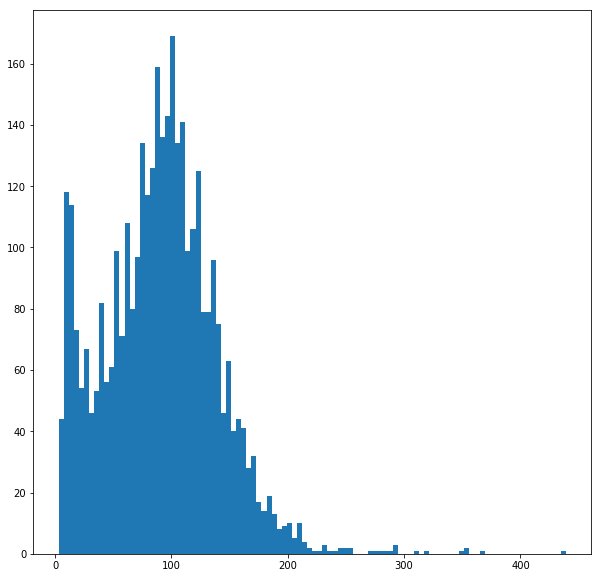

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.hist(length,bins=100)
plt.show()

In [46]:
# we can check the distribution:
dictionary_6yr.doc2bow(['tree'])

[(168, 1)]

In [45]:
lda_6yr.get_topic_terms(0)

[(168, 0.041298619004022638),
 (702, 0.016027947586980906),
 (140, 0.014891558170013213),
 (122, 0.013567037353829603),
 (620, 0.01350874076111285),
 (1497, 0.013417752449426791),
 (1595, 0.012311221867655382),
 (476, 0.011519817032102879),
 (401, 0.011227522127546789),
 (536, 0.01109819045270098)]